In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Artisan clustering

When I was going through the $K$-means chapter of the amazing Christopher M. Bishop: Pattern Recognition and Machine Learning textbook I encountered a short section where he presents some examples for using $ K $-means in two simple image processing tasks. This section made me realize something: creating art by backpropagating error signals from CNN layers to 3D tensors of gaussian noise is [way too flashy](https://photos.google.com/share/AF1QipPX0SCl7OzWilt9LnuQliattX4OUCj_8EP65_cTVnBmS1jnYgsGQAieQUc1VQWdgQ?key=aVBxWjhwSzg2RjJWLWRuVFBBZEN1d205bUdEMnhB) and definitely not a good fit for your craft beer + burger-with-home-made-fries-style gastro pub decor. In this post I would like to give the real [crate diggers](http://www.urbandictionary.com/define.php?term=cratedigger) a tutorial on how to implement K-means color quantization in python to create low-fi images in a nostalgically overcomplicated way. 



## $K$-means

Clustering algorithms cannot get anymore classic, than $K$-means. It was invented by Stuart Lloyd in 1957, same year when John Coltrane released [Blue Train](https://www.youtube.com/watch?v=ETT6n1GluwQ). The problem setting is the following: given a set of samples $X= x_{1}, \ldots, x_{n}$, where each $ x_{i} $ is a $ d $ dimensional Euclidean vector, we are trying to find a given $K$ number of clusters. Additionally, we assume that a "good" clustering is such that given a group of data points, the sum of their inter-group distances is smaller than their distance from points belonging to different groups. The way the $K$ -means algorithm formulates this problem is that it is trying to find $1, \ldots, K $ number of $d$ dimensional points $\mu_{k}$, where $\mu_{k}$ is the prototype or "mean" of the $k^{th}$ cluster. Given our assumption about "good" clusters, we are searching for means
$\mu_{1}, \ldots, \mu_{k}$ by minimizing the squares of the distances of each data point to its closest vector
$\mu_{k}$. A detailed explanation is outside of the scope of this tutorial as here we are only interested
in cool looking stuff created in a needlessly complicated, but not too hard and definitely old school way. For a comprehensive tutorial check out [this video](https://www.youtube.com/watch?v=Ao2vnhelKhI)

## $K$-means for hipster café art

To start our 15 minute long journey into creating historic [SodoSopa](https://en.wikipedia.org/wiki/The_City_Part_of_Town) style art works we first need to import some packages.

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import scipy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The next step is to load the image. The image is loaded  as a $ width\times{height}\times{3}$
array. For example an image of $32\times{32}$pixels is stored as a $32\times{32}\times{3}$
numpy array. The three  $32\times{32}$ matrices correspond to the three RGB channels - red, green and blue -
and each of the cells in these matrices to an intensity value. To create a training set for the 
clustering we take the $32\times{32}\times{3}$ image and create an $1024\times{3}$ matrix where
each of the columns is the original $32\times{32}$ color channel flattened out to a vector.
This is going to be the training set for the clustering algorithm: $1024$ samples and $3 $
features - red, green, blue.

In [2]:
def load_image(path):
    img = scipy.misc.imread(path)
    w, h ,c = img.shape     # remember with, height and channels
    samples = img.reshape((w*h), c)
    return img, w, h, c, samples

def show_image(img, coef=1):
    figure(figsize=(w/coef, h/coef))
    plt.imshow(img.astype("uint8"))
    

Original shape: 449 720 3
Flattened: (323280, 3)


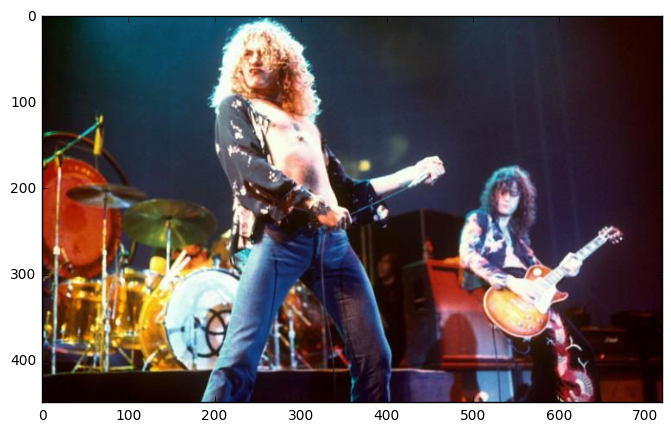

In [3]:
image, w, h, c, samples = load_image("led-zep-1-large_trans++qVzuuqpFlyLIwiB6NTmJwRWh7JMUrw5S69_Kb2uJ7x4.jpg")
show_image(image, 50)

print "Original shape:", w,h,c
print "Flattened:", samples.shape

The original image we are working with is this awesome photo of the guys from Led Zeppelin.

Most of our work is already done! Now let's just grab the $K$-means clustering algorithm from the scikit-learn
shelf and at fit it to the image. 


In [4]:
clf = KMeans(n_clusters=4,
             precompute_distances=True, 
             n_jobs=-1)
labels = clf.fit_predict(samples)

The algorithm has now found the 4 means in the image space and we can use it to assign each of the
training samples to one of the 4 labels. In our $32\times{32}$ example this gives us 1024 labels,
one for each pixel in the original image. Using a colormap to assign each of these labels to a particular
color we can get a pretty nice looking hipster-café style image:

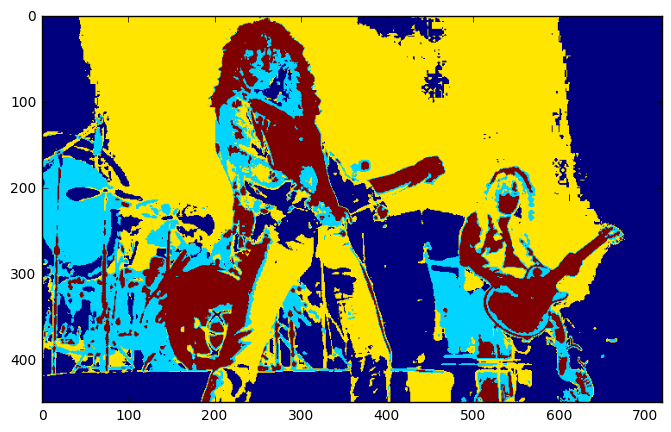

In [5]:
show_image(labels.reshape((w,h)), 50)


The original example from the Pattern Recognition and Machine Learning book, rather than taking the labels themselves and mapping them a to a specific color takes the actual means found by the $K$ -means algorithm. In this example the pixels were assigned to 4 clusters, so we have 4 means, each of which is a 3 dimensional point in the RGB image space. First we go through the labels and create a list where we store the means corresponding to the labels instead of the labels themselves and then reshape the resulting array to the original dimensionality of the image. The show_image(img, coef) also converts the resulting array into unsigned 8-bit integers (0-255) so that the plotting function can interpret the colors correctly. 

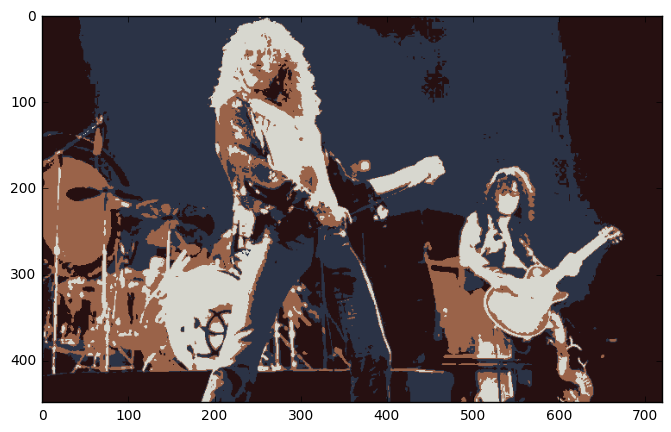

In [6]:
reconstruct = np.array(map(lambda x: clf.cluster_centers_[x], labels)).reshape((w,h, 3))
show_image(reconstruct, 50);

Let's try it now in the burger-fries-beer domain

Original shape: 1360 2048 3
Flattened: (2785280, 3)


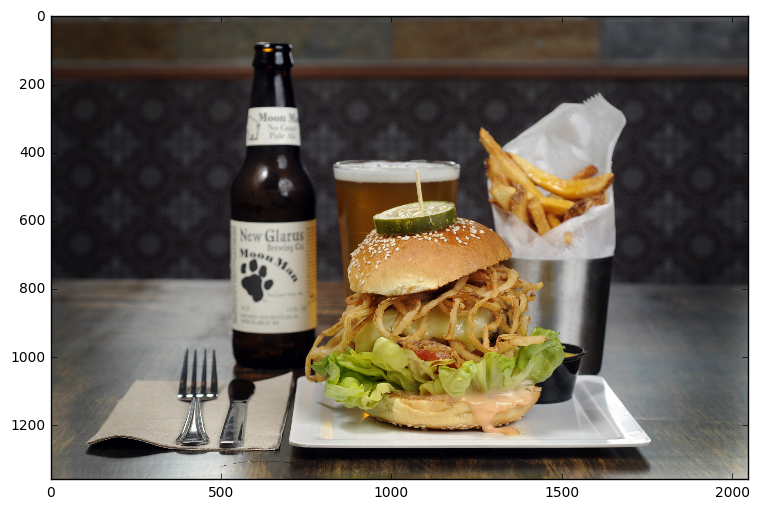

In [7]:
image, w, h, c, samples = load_image("mjs-deptollajakes09.jpg")
show_image(image, coef=150) # showing the image
print "Original shape:", w,h,c
print "Flattened:", samples.shape

By setting the number of clusters to 3 and applying the labels+colormap 
technique to create the image we can impress our costumers with this beauty:

In [8]:
clf = KMeans(n_clusters=3,
             precompute_distances=True, 
             n_jobs=-1)
labels = clf.fit_predict(samples)

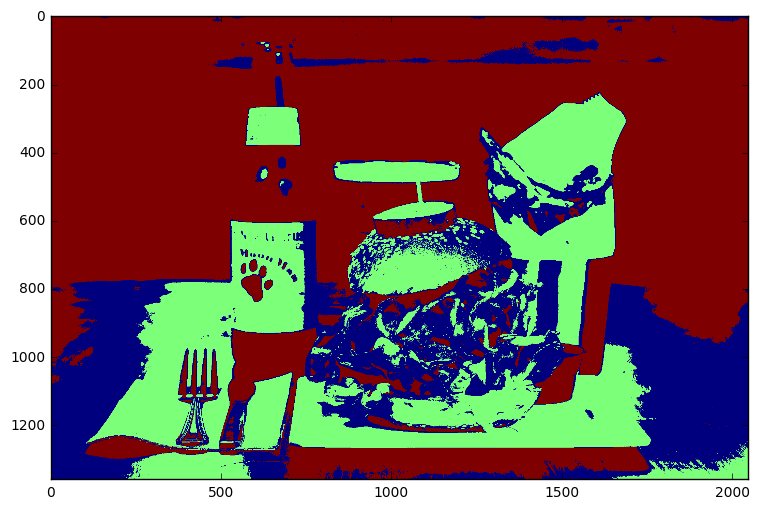

In [9]:
show_image(labels.reshape((w,h)), 150)



Using the actual means rather than the labels we can create a perfectly mediocre hipster-café style picture.




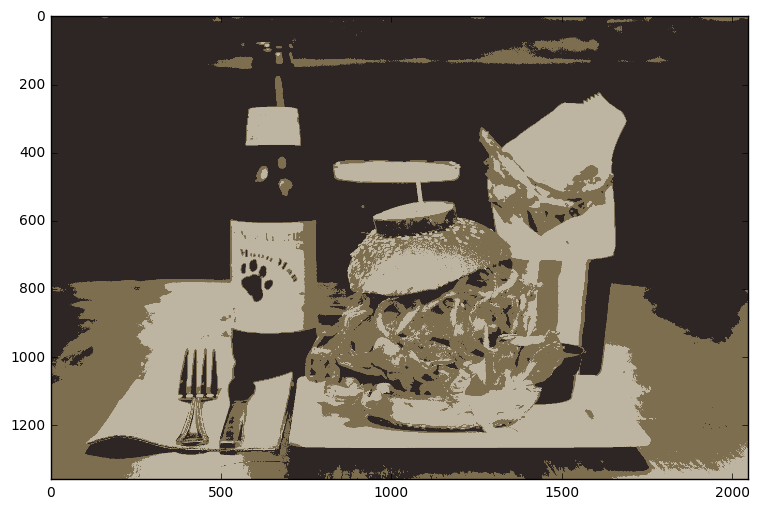

In [10]:
reconstruct = np.array(map(lambda x: clf.cluster_centers_[x], labels)).reshape((w,h, 3))
show_image(reconstruct, 150)

So basically this is all you need to run the color quantization:

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import scipy


def hipsterize(img, n_clusters):
    w, h ,c = img.shape
    samples = img.reshape((w*h), c)
    clf = KMeans(n_clusters=n_clusters,
             precompute_distances=True, 
             n_jobs=-1)
    labels = clf.fit_predict(samples)
    means = clf.cluster_centers_.astype("uint8")
    reconstruct = np.array(map(lambda x: means[x], labels)).reshape((w,h, 3))
    return reconstruct



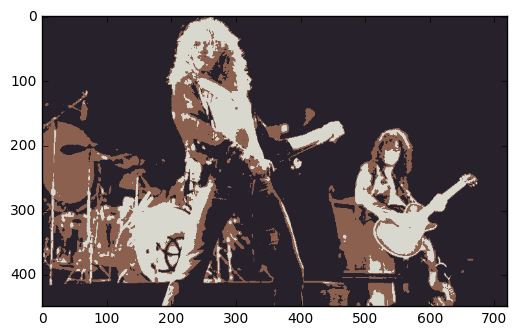

In [5]:
img = scipy.misc.imread("led-zep-1-large_trans++qVzuuqpFlyLIwiB6NTmJwRWh7JMUrw5S69_Kb2uJ7x4.jpg")
img = hipsterize(img, 3)
imshow(img)

## Color quantization for image compression

Actually we can store the the means as a "codec".

    means = clf.cluster_centers_.astype("uint8")

We can compress an image by rather than storing a $h\times{w}\times{3}$ tensor we only store a
$I = h\times{w}$ matrix where $I_{i,j}$ corresponds to the cluster label. In addition we need to store
our codec, which is a $M = n\times{3}$ matrix of $n$ means where row $I_{:,i}$ corresponds to the mean
of the $i$-th cluster.

So let's train the codec. Here we load the cifar100 image data set from keras and reshape the images like we did before.

In [21]:
from keras.datasets import cifar100

In [23]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
print X_train.shape
n, c, h, w = X_train.shape
train_samples = X_train.reshape(n*w*h, c)
print train_samples.shape

(50000, 3, 32, 32)
(51200000, 3)


Now let's fit the model to the data. The resulting codec will have 200 colors and is trained on the first 100000 pixels of the cifar100.

In [18]:
clf = KMeans(n_clusters=200,
             precompute_distances=True, 
             n_jobs=-1)
clf.fit(train_samples[:100000])
means = clf.cluster_centers_.astype("uint8")


And here is the codec in action:

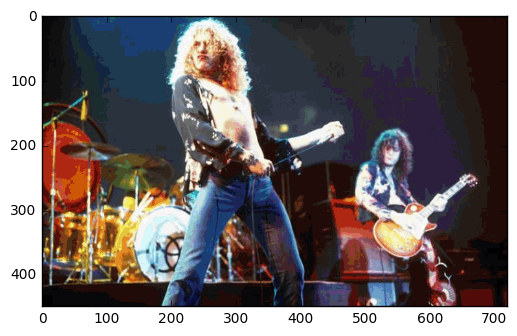

In [27]:
test_img = scipy.misc.imread("led-zep-1-large_trans++qVzuuqpFlyLIwiB6NTmJwRWh7JMUrw5S69_Kb2uJ7x4.jpg")
w, h, c = test_img.shape
labels = clf.predict(test_img.reshape(w*h, c))
reconstruct = np.array(map(lambda x: means[x], labels)).reshape((w,h, 3))
imshow(reconstruct)

In [28]:
test_img = scipy.misc.imread("mjs-deptollajakes09.jpg")
w, h, c = test_img.shape
labels = clf.predict(test_img.reshape(w*h, c))
reconstruct = np.array(map(lambda x: means[x], labels)).reshape((w,h, 3))
imshow(reconstruct)

NameError: global name 'means' is not defined

## Shout-out to thresholding

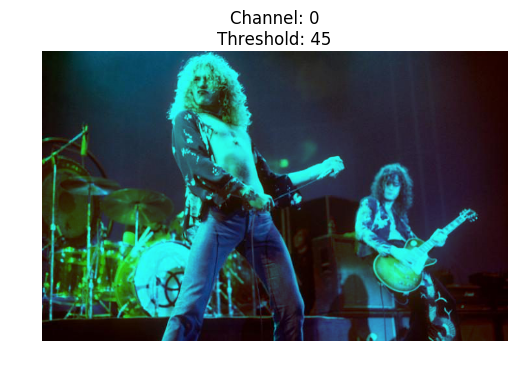

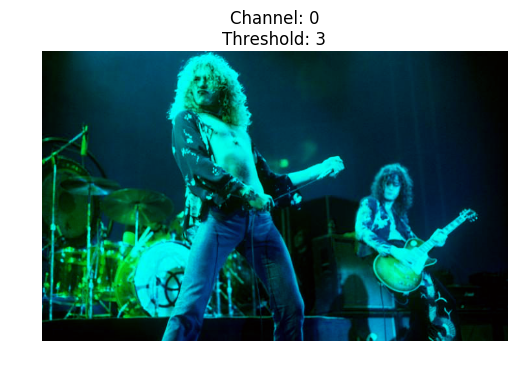

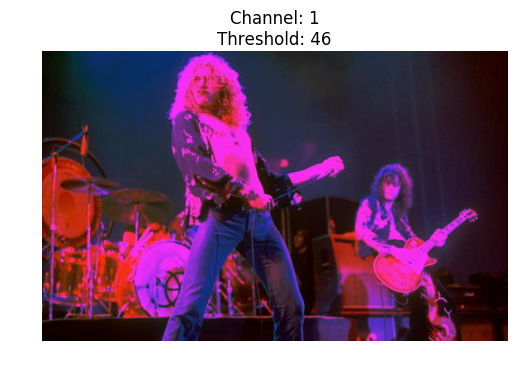

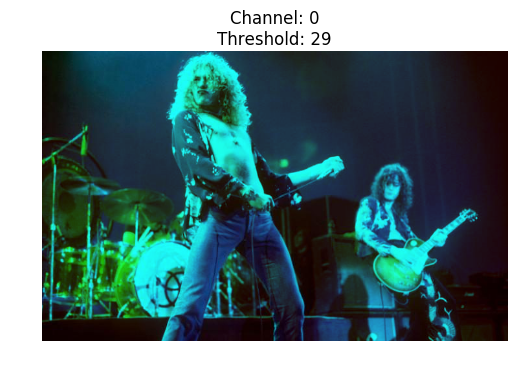

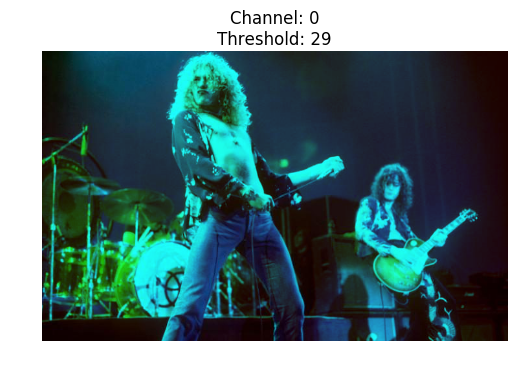

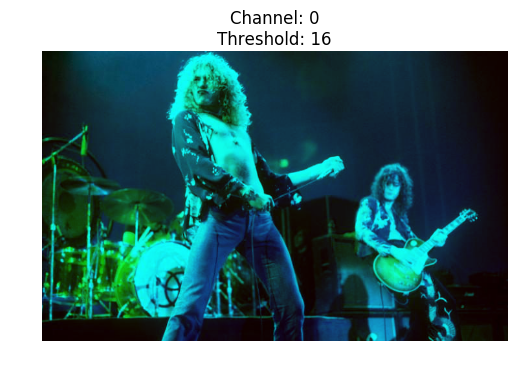

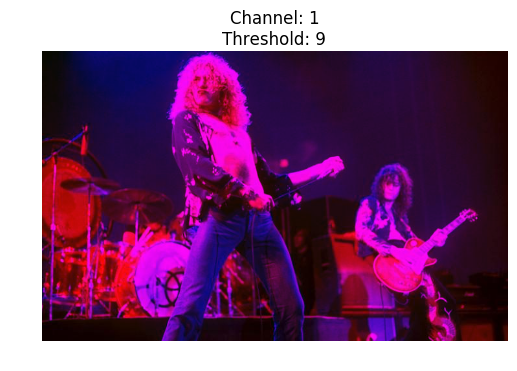

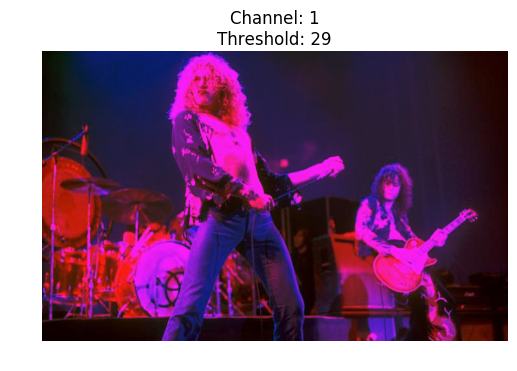

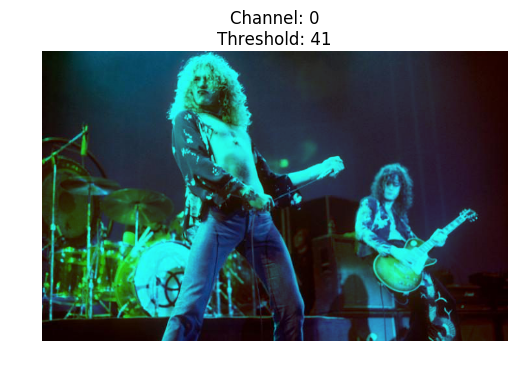

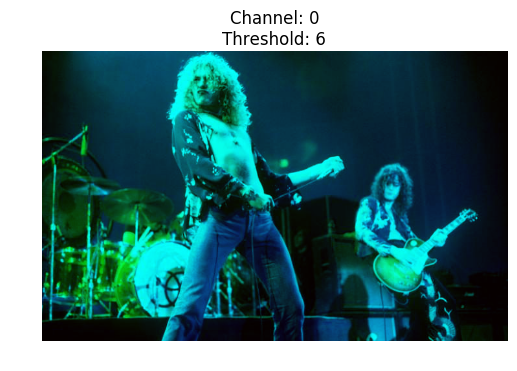

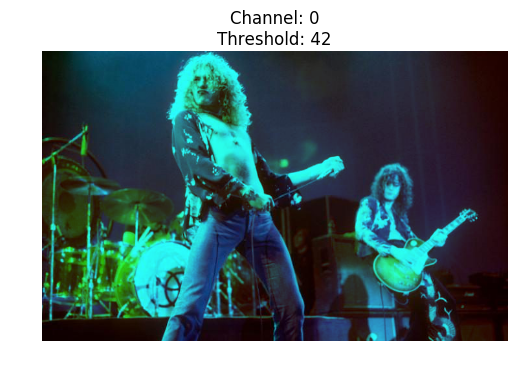

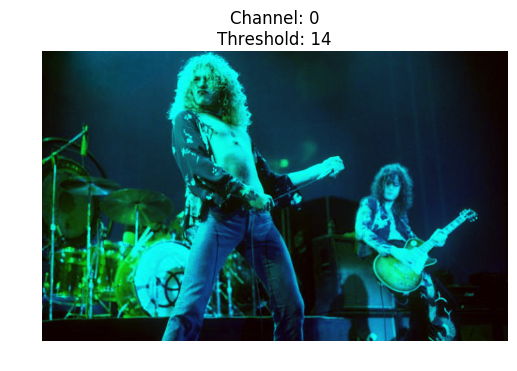

In [7]:
#figure(figsize=(30,30))
for i in range(0,12):
    # plt.subplot(6,2,i+1)
    img = imread("led-zep-1-large_trans++qVzuuqpFlyLIwiB6NTmJwRWh7JMUrw5S69_Kb2uJ7x4.jpg")
    threshold = np.random.randint(1,50)
    c = np.random.randint(0,2)
    k = np.random.randint(0,10)
    np.clip(img[...,c], a_min=0, a_max=threshold, out=img[...,c])
    imshow(img)
    plt.title("Channel: " + str(c) + "\n" +
              "Threshold: " + str(threshold))
    plt.axis('off')
    plt.show()
    img = hipsterize(img, k+1)
    plt.axis('off')

   
# plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)

